In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path= "/content/drive/MyDrive/Questionnaire.xlsx"
df = pd.read_excel(path)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df.head()

,Name,Unnamed: 1,Current Study Status,Department Name/Group(HSC Students),Institution Name,Q5,Courses completed,Q7,Unnamed: 8,Digital learning is better \nthan traditional learning,...,Parents acceptance,Improvements in\nacademic performance,Idea about that topic\nwas cleared perfectly,Digital Learning is a\nblessing for us,Q21,Type of Platforms preferred,Time of getting dependent\nin elearning Platforms,Preferrable duration(per class),Essential Features,Q26
0,NaN,Male: 42%\nFemale: 58%,NaN,NaN,NaN,Stongly agree: 52%\nStrongly Disagree: 2.5%\nN...,NaN,Prefer Free Course or Paid Course\nFree:\nPaid:,Amount(tk),Stongly agree: 17%\nStrongly Disagree: 9%\nNeu...,...,Positive: 74.2%\nNegative: 9.4%\nUnsure: 16.4%,Yes: 69.3%\nNo: 13.9%\nUnsure: 16.8%,Stongly agree: 30.3%\nStrongly Disagree: 2.5%\...,Stongly agree: 39.8%\nStrongly Disagree: 2.9%\...,Stongly agree: 19.3%\nStrongly Disagree: 9.8%\...,International Platform: 22.5%\nBD Platform: 11...,At the time of Covid-19: 71.7%\nAfter Covid-19...,Less than 1 hours: 45.1%\n1 to 2 hours: 51.2%\...,Easy to use: 43.4%\nDifferent learning options...,Yes: 41%\n No: 59%
1,Abdullah Al Main,Male,Undergraduate,Science,Al Helal Adarsha Degree College,Strongly agree,9.0,Free,NaN,Somewhat disagree,...,Positive,Yes,Strongly Agree,Neutral,Neutral,International Platform,At the time of Covid-19,Less than 1 hours,Personalization\nEasy to connect with other tools,No
2,Noshin Tarannum Juli,Female,Graduate,Mathematics,BAF Shaheen Chattogram,Strongly agree,0.0,No,NaN,Somewhat agree,...,Positive,Yes,Strongly Agree,Strongly agree,Stomewhat agree,Both,At the time of Covid-19,1 to 2 hours,Different learning options,Yes
3,Syeda Ramisa Anan,Female,Graduate,Science,Baitush saraf Adarsha kamil madrasah,Neutral,0.0,Free,NaN,Neutral,...,Positive,Unsure,Neutral,Neutral,Neutral,International Platform,At the time of Covid-19,1 to 2 hours,Different learning options,No
4,Jannatul ferdaus,Female,Undergraduate,Mathematics,Bandarban Govt College,Strongly agree,5.0,Paid,NaN,Somewhat agree,...,Positive,Unsure,Neutral,Somewhat agree,Somewhat disagree,Both,After Covid-19,Less than 1 hours;1 to 2 hours,Easy to use\nDifferent learning options\nInsta...,No


In [ ]:
df.shape

(244, 28)

**DATA PROCESSING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 28 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0    Name                                                                            243 non-null    object 
 1   Unnamed: 1                                                                       244 non-null    object 
 2   Current Study Status                                                             243 non-null    object 
 3   Department Name/Group(HSC Students)                                              242 non-null    object 
 4   Institution Name                                                                 244 non-null    object 
 5   Q5                                                                               244 non-null    object 
 6   Courses co

In [ ]:
df.describe()

,Courses completed
count,228.000000
mean,1.837719
std,2.625691
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,20.000000


In [ ]:
df["Institution Name"].value_counts()

University of Chittagong                                                           101
Chittagong Cantonment Public College                                                76
Uttara High School and College                                                       7
International Islamic University Chittagong                                          5
Cantonment English School and College                                                4
Government Hazi Mohammad Mohsin College                                              3
Brac University                                                                      3
University of Dhaka                                                                  2
Chittagong Govt. Women's College                                                     2
Chattogram Ma O Sishu Hospital Medical college                                       2
Al Helal Adarsha Degree College                                                      2
Chattagram Bandar College                  

In [ ]:
df["Current Study Status"].value_counts()

Undergraduate          91
College Student        88
Graduate               43
Admission Candidate    21
Name: Current Study Status, dtype: int64

In [ ]:
# Check the amount of null values in the dataset

df.isna().sum()

 Name                                                                                1
Unnamed: 1                                                                           0
Current Study Status                                                                 1
Department Name/Group(HSC Students)                                                  2
Institution Name                                                                     0
Q5                                                                                   0
Courses completed                                                                   16
Q7                                                                                   6
Unnamed: 8                                                                         165
Digital learning is better \nthan traditional learning                               0
Q9                                                                                   0
Type of Courses prefer most                

In [ ]:
#  Since there are just a few missing values, I'm filtering out to see them 
# so that I can make an informed decision about how to handle them

df[df.isna().any(axis = 1)]

,Name,Unnamed: 1,Current Study Status,Department Name/Group(HSC Students),Institution Name,Q5,Courses completed,Q7,Unnamed: 8,Digital learning is better \nthan traditional learning,...,Parents acceptance,Improvements in\nacademic performance,Idea about that topic\nwas cleared perfectly,Digital Learning is a\nblessing for us,Q21,Type of Platforms preferred,Time of getting dependent\nin elearning Platforms,Preferrable duration(per class),Essential Features,Q26
0,NaN,Male: 42%\nFemale: 58%,NaN,NaN,NaN,Stongly agree: 52%\nStrongly Disagree: 2.5%\nN...,NaN,Prefer Free Course or Paid Course\nFree:\nPaid:,Amount(tk),Stongly agree: 17%\nStrongly Disagree: 9%\nNeu...,...,Positive: 74.2%\nNegative: 9.4%\nUnsure: 16.4%,Yes: 69.3%\nNo: 13.9%\nUnsure: 16.8%,Stongly agree: 30.3%\nStrongly Disagree: 2.5%\...,Stongly agree: 39.8%\nStrongly Disagree: 2.9%\...,Stongly agree: 19.3%\nStrongly Disagree: 9.8%\...,International Platform: 22.5%\nBD Platform: 11...,At the time of Covid-19: 71.7%\nAfter Covid-19...,Less than 1 hours: 45.1%\n1 to 2 hours: 51.2%\...,Easy to use: 43.4%\nDifferent learning options...,Yes: 41%\n No: 59%
1,Abdullah Al Main,Male,Undergraduate,Science,Al Helal Adarsha Degree College,Strongly agree,9.0,Free,NaN,Somewhat disagree,...,Positive,Yes,Strongly Agree,Neutral,Neutral,International Platform,At the time of Covid-19,Less than 1 hours,Personalization\nEasy to connect with other tools,No
2,Noshin Tarannum Juli,Female,Graduate,Mathematics,BAF Shaheen Chattogram,Strongly agree,0.0,No,NaN,Somewhat agree,...,Positive,Yes,Strongly Agree,Strongly agree,Stomewhat agree,Both,At the time of Covid-19,1 to 2 hours,Different learning options,Yes
3,Syeda Ramisa Anan,Female,Graduate,Science,Baitush saraf Adarsha kamil madrasah,Neutral,0.0,Free,NaN,Neutral,...,Positive,Unsure,Neutral,Neutral,Neutral,International Platform,At the time of Covid-19,1 to 2 hours,Different learning options,No
4,Jannatul ferdaus,Female,Undergraduate,Mathematics,Bandarban Govt College,Strongly agree,5.0,Paid,NaN,Somewhat agree,...,Positive,Unsure,Neutral,Somewhat agree,Somewhat disagree,Both,After Covid-19,Less than 1 hours;1 to 2 hours,Easy to use\nDifferent learning options\nInsta...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Tahmina Akhtar,Female,Graduate,Department of Law,University of Dhaka,Somewhat agree,0.0,Paid,NaN,Somewhat disagree,...,Positive,Yes,Neutral,Somewhat agree,Stomewhat agree,Both,At the time of Covid-19,1 to 2 hours,Easy to use\nDifferent learning options\nInsta...,No
237,Shaniid Hossain Shakib,Male,Undergraduate,Mathematics,Uttara High School and College,Strongly agree,0.0,Yes,NaN,Strongly agree,...,Positive,Yes,Strongly Agree,Strongly agree,Strongly Agree,Both,At the time of Covid-19,1 to 2 hours,Easy to access for all,Yes
238,Shamimul Islam Fahim,Male,Undergraduate,Mathematics,Uttara High School and College,Somewhat agree,NaN,Paid,12000,Neutral,...,Negative,Yes,Strongly Agree,Somewhat agree,Stomewhat agree,Both,After Covid-19,I am unsure,Different learning options,Yes
239,Sadia Akther,Female,Undergraduate,LAW,Uttara High School and College,Neutral,0.0,i am not sure.,NaN,Somewhat disagree,...,Positive,Yes,Neutral,Neutral,Stomewhat agree,I am unsure,Before Covid-19,I am unsure,Collaboration,No


In [ ]:
# I"ve decided not to drop the rows with missing values because although the missing values are
# insignificant for my analysis, however other items in the affected rows provide 
# valueable insight into my analysis.

# Im replacing all the missing values with "Not interested to say", which is one of the option
# in the "Suicide attempt" column

df.select_dtypes(include=['object']).fillna(value='Not interested to say', inplace=True)

In [ ]:
df.iloc[237: 240]

,Name,Unnamed: 1,Current Study Status,Department Name/Group(HSC Students),Institution Name,Q5,Courses completed,Q7,Unnamed: 8,Digital learning is better \nthan traditional learning,...,Parents acceptance,Improvements in\nacademic performance,Idea about that topic\nwas cleared perfectly,Digital Learning is a\nblessing for us,Q21,Type of Platforms preferred,Time of getting dependent\nin elearning Platforms,Preferrable duration(per class),Essential Features,Q26
237,Shaniid Hossain Shakib,Male,Undergraduate,Mathematics,Uttara High School and College,Strongly agree,0.0,Yes,NaN,Strongly agree,...,Positive,Yes,Strongly Agree,Strongly agree,Strongly Agree,Both,At the time of Covid-19,1 to 2 hours,Easy to access for all,Yes
238,Shamimul Islam Fahim,Male,Undergraduate,Mathematics,Uttara High School and College,Somewhat agree,NaN,Paid,12000,Neutral,...,Negative,Yes,Strongly Agree,Somewhat agree,Stomewhat agree,Both,After Covid-19,I am unsure,Different learning options,Yes
239,Sadia Akther,Female,Undergraduate,LAW,Uttara High School and College,Neutral,0.0,i am not sure.,NaN,Somewhat disagree,...,Positive,Yes,Somewhat disagree,Neutral,Stomewhat agree,I am unsure,Before Covid-19,I am unsure,Collaboration,No


# #**EDA**

### Percentage of responses of usage of technology can bring revolution in education sector and can expertise one to compete globally.

In [ ]:
pct_strongly_agree = df["Q5"].value_counts(normalize=True)["Strongly agree"]
pct_strongly_disagree = df["Q5"].value_counts(normalize=True)["Strongly disagree"]
pct_tech_revolution = round(pct_strongly_agree + pct_strongly_disagree, 2)
response_revolution = pd.Series({"Strongly agree": pct_strongly_agree,
                                 "Strongly disagree": pct_strongly_disagree,
                                 "Neutral": 1 - pct_tech_revolution})
response_revolution


Strongly agree       0.520492
Strongly disagree    0.024590
Neutral              0.450000
dtype: float64

<Axes: >

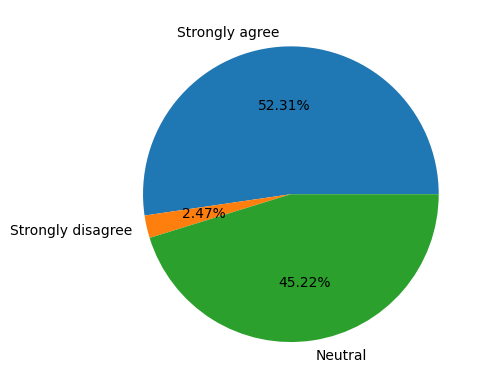

In [ ]:
response_revolution.plot.pie(label = "", autopct = "%.2f%%")

### Range of learners of completing courses from BD elearning platforms

In [ ]:
# Extract the column data
column_data = df['Courses completed']


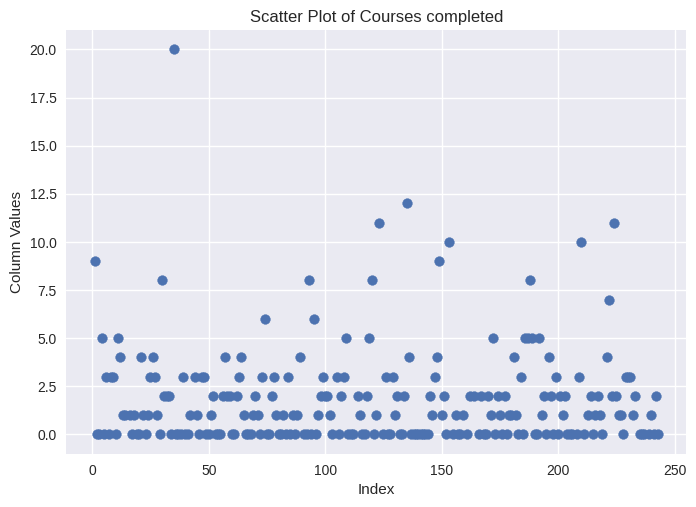

In [ ]:
import plotly.express as px

# Create the scatter plot
plt.scatter(range(len(column_data)), column_data)

# Customize the plot
plt.title('Scatter Plot of Courses completed')
plt.xlabel('Index')
plt.ylabel('Column Values')

# Display the plot
plt.show()

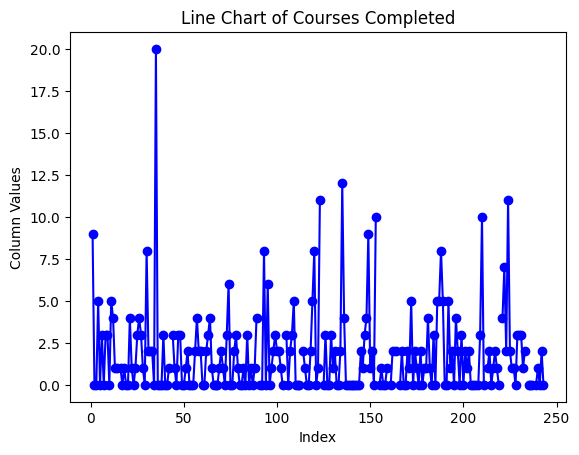

In [ ]:
import matplotlib.pyplot as plt

# Extract the column data
column_data = df['Courses completed']

# Create the line chart
plt.plot(range(len(column_data)), column_data, color='blue', marker='o')

# Customize the plot
plt.title('Line Chart of Courses Completed')
plt.xlabel('Index')
plt.ylabel('Column Values')

# Display the plot
plt.show()


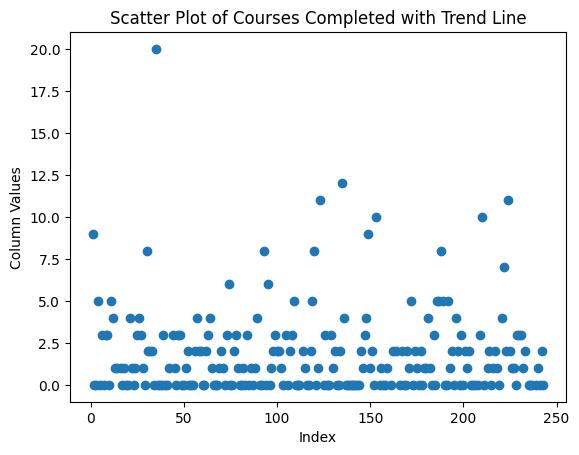

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the column data
column_data = df['Courses completed']

# Create the scatter plot
plt.scatter(range(len(column_data)), column_data)

# Fit a line to the data points
fit = np.polyfit(range(len(column_data)), column_data, 1)
trend_line = np.poly1d(fit)
plt.plot(range(len(column_data)), trend_line(range(len(column_data))), color='red')

# Customize the plot
plt.title('Scatter Plot of Courses Completed with Trend Line')
plt.xlabel('Index')
plt.ylabel('Column Values')

# Display the plot
plt.show()


### Types of Platform prefered by each study group(Q2+Q22)

In [ ]:
# The frequency of types of platforms prefer most by study status group

International_Platform_Current_Status = df.loc[df["Type of Platforms preferred"] == "International Platform", "Current Study Status" ].value_counts()


# Number of participants in each Current Study Status group
nums_Study_Status = df["Current Study Status"].value_counts()

In [ ]:
pct_Current_Status_International_Platform = International_Platform_Current_Status.divide(nums_Study_Status)

<Axes: title={'center': 'Percentage of International Platform prefer by each study status group'}>

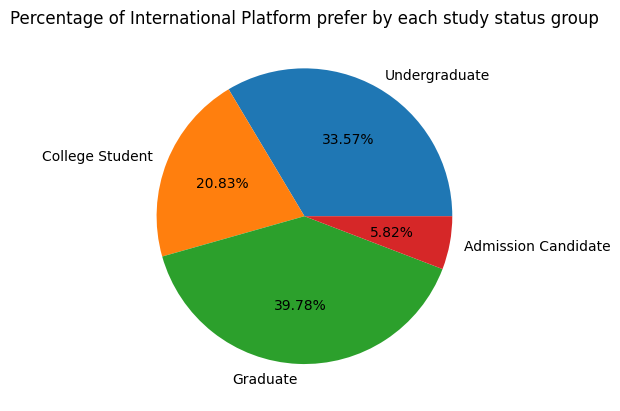

In [ ]:
pct_Current_Status_International_Platform.plot.pie(label = "", title = "Percentage of International Platform prefer by each study status group", autopct = "%.2f%%")

In [ ]:
# The frequency of types of platforms prefer most by study status group

BD_Platform_Current_Status = df.loc[df["Type of Platforms preferred"] == "BD platform", "Current Study Status" ].value_counts()

# Number of participants in each Current Study Status group
nums_Study_Status = df["Current Study Status"].value_counts()

In [ ]:
pct_Current_Status_BD_Platform = BD_Platform_Current_Status.divide(nums_Study_Status)

<Axes: title={'center': 'Percentage of BD Platform prefer by each study status group'}>

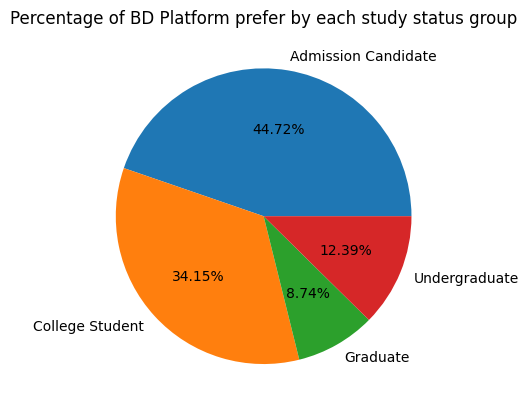

In [ ]:
pct_Current_Status_BD_Platform.plot.pie(label = "", title = "Percentage of BD Platform prefer by each study status group", autopct = "%.2f%%")

In [ ]:
# The frequency of types of platforms prefer most by study status group

Both_Platform_Current_Status = df.loc[df["Type of Platforms preferred"] == "Both", "Current Study Status" ].value_counts()

# Number of participants in each Current Study Status group
nums_Study_Status = df["Current Study Status"].value_counts()

In [ ]:
pct_Current_Status_Both_Platform = Both_Platform_Current_Status.divide(nums_Study_Status)

<Axes: title={'center': 'Percentage of Both Platform prefer by each study status group'}>

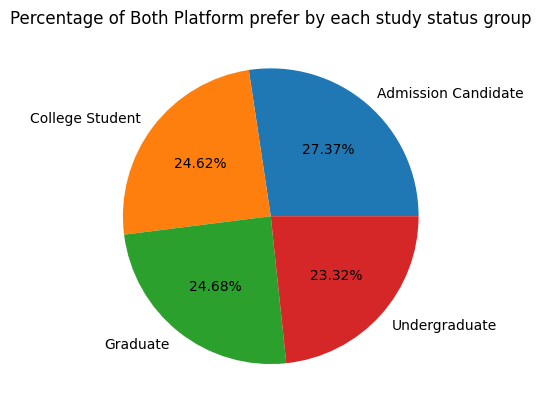

In [ ]:
pct_Current_Status_Both_Platform.plot.pie(label = "", title = "Percentage of Both Platform prefer by each study status group", autopct = "%.2f%%")

### Influence of ed tech on education before and after covid(Q18+Q23)

In [ ]:
# The frequency of time getting dependent in elearning platforms

getting_dependent_improvements = df.loc[df["Time of getting dependent\nin elearning Platforms"] == "At the time of Covid-19", "Improvements in\nacademic performance" ].value_counts()

# Number of participants in each Improvements in academic performance group
nums_improvements = df["Improvements in\nacademic performance"].value_counts()

In [ ]:
pct_improvements_getting_dependent = getting_dependent_improvements.divide(nums_improvements)

<Axes: title={'center': 'Improvements on academic performance of the respondants who got dependent on edtech from the time of COVID'}>

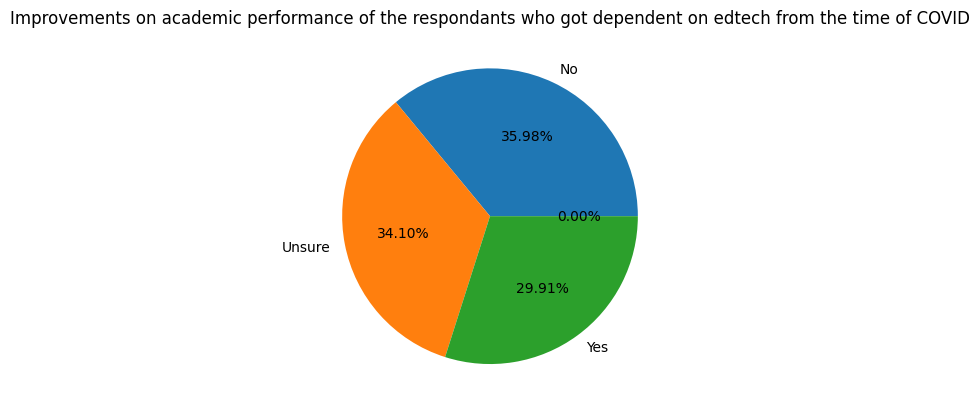

In [ ]:
pct_improvements_getting_dependent.plot.pie(label = "", title = "Improvements on academic performance of the respondants who got dependent on edtech from the time of COVID", autopct = "%.2f%%")

## Q6+Q23

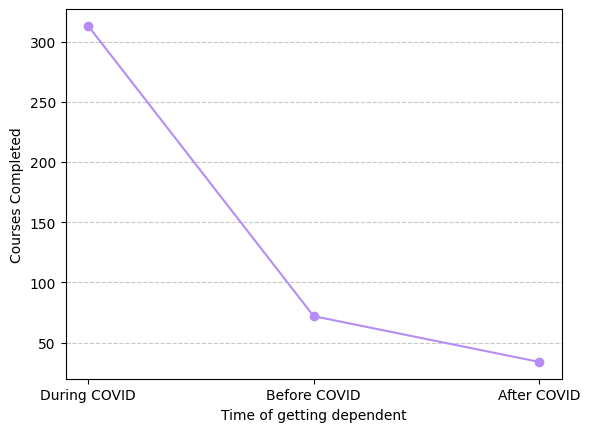

In [ ]:
import matplotlib.pyplot as plt

# Define the colors for the line
colors = ['#B68DF6']

# Filter the data for courses completed during COVID
during_covid = df[df['Time of getting dependent\nin elearning Platforms'] == 'At the time of Covid-19']

# Calculate the total number of courses completed during COVID
courses_during_covid = during_covid['Courses completed'].sum()

# Filter the data for courses completed before COVID
before_covid = df[df['Time of getting dependent\nin elearning Platforms'] == 'Before Covid-19']

# Calculate the total number of courses completed before COVID
courses_before_covid = before_covid['Courses completed'].sum()

# Filter the data for courses completed after COVID
after_covid = df[df['Time of getting dependent\nin elearning Platforms'] == 'After Covid-19']

# Calculate the total number of courses completed after COVID
courses_after_covid = after_covid['Courses completed'].sum()

# Create a line chart
categories = ['During COVID', 'Before COVID', 'After COVID']
courses_completed = [courses_during_covid, courses_before_covid, courses_after_covid]

plt.plot(categories, courses_completed, marker='o', color=colors[0])

# Customize the chart's appearance
plt.xlabel('Time of getting dependent')
plt.ylabel('Courses Completed')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the plot
plt.show()


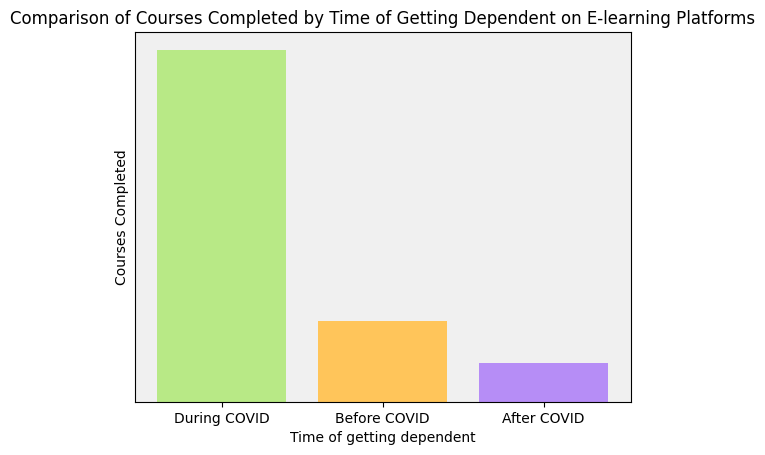

In [ ]:
# Define the colors for the bars
colors = ['#B8E986', '#FFC55A', '#B68DF6']

# Filter the data for courses completed during COVID
during_covid = df[df['Time of getting dependent\nin elearning Platforms'] == 'At the time of Covid-19']

# Calculate the total number of courses completed during COVID
courses_during_covid = during_covid['Courses completed'].sum()

# Filter the data for courses completed before COVID
before_covid = df[df['Time of getting dependent\nin elearning Platforms'] == 'Before Covid-19']

# Calculate the total number of courses completed before COVID
courses_before_covid = before_covid['Courses completed'].sum()

# Filter the data for courses completed after COVID
after_covid = df[df['Time of getting dependent\nin elearning Platforms'] == 'After Covid-19']

# Calculate the total number of courses completed after COVID
courses_after_covid = after_covid['Courses completed'].sum()

# Create a bar chart
categories = ['During COVID', 'Before COVID', 'After COVID']
courses_completed = [courses_during_covid, courses_before_covid, courses_after_covid]

plt.bar(categories, courses_completed, color=colors)
plt.xlabel('Time of getting dependent')
plt.ylabel('Courses Completed')
plt.title('Comparison of Courses Completed by Time of Getting Dependent on E-learning Platforms')
plt.yticks([])

plt.gca().set_facecolor('#F0F0F0')

plt.show()

### People who prefer free courses have completed most courses

# Strognly agree vs yes no

In [ ]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Q15+Q16

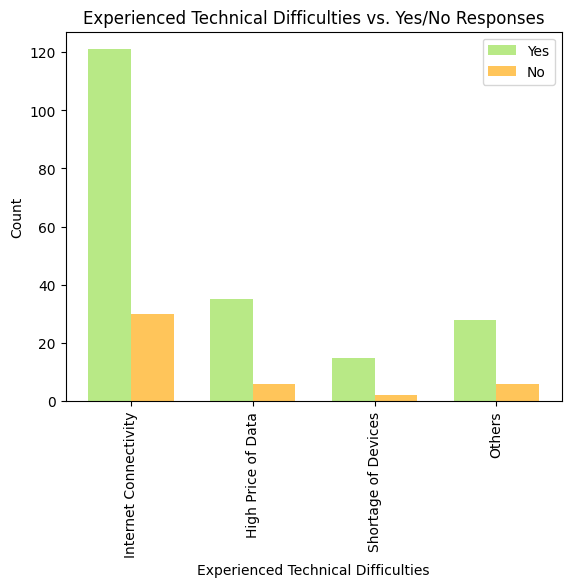

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to include only "Yes" responses in Q26 for the "Experienced technical difficulties using e-learning Platforms" column
yes_responses_df = df[df["EdTech can bridge the education gap for students from disadvantaged backgrounds"] == "Yes"]

# Filter the DataFrame to include only "No" responses in Q26 for the "Experienced technical difficulties using e-learning Platforms" column
no_responses_df = df[df["EdTech can bridge the education gap for students from disadvantaged backgrounds"] == "No"]

# Count the frequency of "Yes" responses in the "Experienced technical difficulties using e-learning Platforms" column
internet_count_yes = yes_responses_df["Experienced technical difficulties using elearning Platforms"].value_counts().get("Internet Connectivity", 0)
price_count_yes = yes_responses_df["Experienced technical difficulties using elearning Platforms"].value_counts().get("High Price of Data", 0)
devices_count_yes = yes_responses_df["Experienced technical difficulties using elearning Platforms"].value_counts().get("Shortage of Devices", 0)
others_count_yes = yes_responses_df["Experienced technical difficulties using elearning Platforms"].value_counts().get("Others", 0)

# Count the frequency of "No" responses in the "Experienced technical difficulties using e-learning Platforms" column
internet_count_no = no_responses_df["Experienced technical difficulties using elearning Platforms"].value_counts().get("Internet Connectivity", 0)
price_count_no = no_responses_df["Experienced technical difficulties using elearning Platforms"].value_counts().get("High Price of Data", 0)
devices_count_no = no_responses_df["Experienced technical difficulties using elearning Platforms"].value_counts().get("Shortage of Devices", 0)
others_count_no = no_responses_df["Experienced technical difficulties using elearning Platforms"].value_counts().get("Others", 0)

# Create a bar plot
labels = ["Internet Connectivity", "High Price of Data", "Shortage of Devices", "Others"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [internet_count_yes, price_count_yes, devices_count_yes, others_count_yes], width, label='Yes', color='#B8E986')
rects2 = ax.bar(x + width/2, [internet_count_no, price_count_no, devices_count_no, others_count_no], width, label='No', color='#FFC55A')

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Experienced Technical Difficulties')
ax.set_ylabel('Count')
ax.set_title('Experienced Technical Difficulties vs. Yes/No Responses')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

# Display the plot
plt.show()


## Q14+Q19

# Q5+Q20

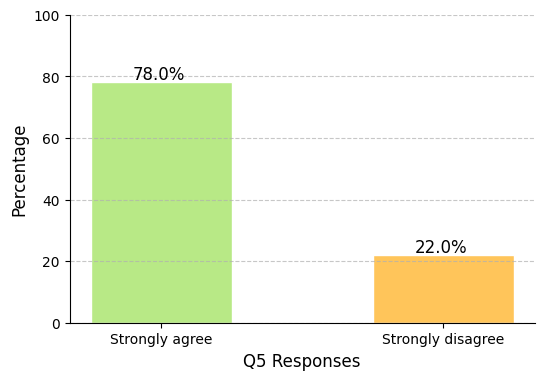

In [ ]:
#Filter the DataFrame to include only "Strongly agree" responses in Q20
strongly_agree_df = df[df["Digital Learning is a\nblessing for us"] == "Strongly agree"]

# Count the frequency of "strongly agree" and "strongly disagree" responses in Q5 for "Strongly agree" in Q20
strongly_agree_count = strongly_agree_df["Q5"].value_counts().get("Strongly agree", 0)
strongly_disagree_count = strongly_agree_df["Q5"].value_counts().get("Strongly disagree", 0)
# Calculate the percentage of "strongly agree" and "strongly disagree" responses
total_responses = strongly_agree_count + strongly_disagree_count
pct_strongly_agree = (strongly_agree_count / total_responses) * 100
pct_strongly_disagree = (strongly_disagree_count / total_responses) * 100

# Set up the bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(labels, sizes, color=colors, width=0.5, edgecolor='white')

# Customize the chart's appearance

ax.set_xlabel("Q5 Responses", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the percentages above each bar
for i, v in enumerate(sizes):
    ax.text(i-0.1, v+1, f"{v:.1f}%", fontsize=12)

# Display the plot
plt.show()